In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [4]:
eda_data = pd.read_csv("pred_well_states/EDA.csv")
study_conditions = pd.read_csv("pred_well_states/study-conditions.csv")

In [5]:
def average_eda(array):
    eda_dict= {}
    for person in array:
        if person not in eda_dict:
            eda_dict[person] = eda_data[eda_data.participant == person].eda.tolist()

    total_average = []
    for i in range(3340):
        average = []
        for person in array:
            average.append(eda_dict[person][i])
        total_average.append(statistics.mean(average))
    return total_average

In [6]:
def condition_eda_convert(data_frame):
    p_1 = pd.unique(data_frame["participant"])[0]
    array = pd.unique(data_frame["participant"])
    first = "P0" + str(p_1)
    participant_1 = eda_data[eda_data.participant == first]
    df_start = participant_1
    for num in array[1:]:
        num_str = str(num)
        if len(num_str) == 2:
            part_per = 'P0' + num_str
        else: 
            part_per = 'P' + num_str
        df_part = eda_data[eda_data.participant == part_per]
        part_nature = pd.concat([df_start, df_part])
        df_start = part_nature
    return part_nature

In [7]:
def avg_eda_part(array):
    avg_list_art = []
    for particip in array:
        list_eda = eda_data[eda_data.participant == particip].eda.tolist()
        avg = statistics.mean(list_eda)
        avg_list_art.append(avg)
    return avg_list_art

In [8]:
def average_over_time_div(data_frame, specification):
    room_335_natural = data_frame[data_frame.diversity == specification]
    room_335_full = condition_eda_convert(room_335_natural)
    part_335_nat = pd.unique(room_335_full["participant"])
    return average_eda(part_335_nat)

In [9]:
def average_over_time_mat(data_frame, specification):
    room_335_natural = data_frame[data_frame.materials == specification]
    room_335_full = condition_eda_convert(room_335_natural)
    part_335_nat = pd.unique(room_335_full["participant"])
    return average_eda(part_335_nat)

In [10]:
def convert_to_eda_df_mat(specification):
    natural_study = study_conditions[(study_conditions.materials == specification)]
    person = pd.unique(natural_study['participant'])[0]
    participants =  pd.unique(natural_study['participant'])
    participant_first = eda_data[eda_data.participant == person]
    df_start = participant_first
    for num in participants[1:]:
        num_str = str(num)
        if len(num_str) == 2:
            part_per = 'P0' + num_str
        else: 
            part_per = 'P' + num_str
        df_part = eda_data[eda_data.participant == part_per]
        part_nature = pd.concat([df_start, df_part])
        df_start = part_nature
    return pd.unique(part_nature['participant'])

In [11]:
def convert_to_eda_df_div(specification):
    natural_study = study_conditions[(study_conditions.diversity == specification)]
    person = pd.unique(natural_study['participant'])[0]
    participants = pd.unique(natural_study['participant'])
    participant_first = eda_data[eda_data.participant == person]
    df_start = participant_first
    for num in participants[1:]:
        num_str = str(num)
        if len(num_str) == 2:
            part_per = 'P0' + num_str
        else: 
            part_per = 'P' + num_str
        df_part = eda_data[eda_data.participant == part_per]
        part_nature = pd.concat([df_start, df_part])
        df_start = part_nature
    return pd.unique(part_nature['participant'])

In [12]:
def avg_per_part(array):    
    avg_list_art = []
    for particip in array:
        list_eda = eda_data[eda_data.participant == particip].eda.tolist()
        avg = statistics.mean(list_eda)
        avg_list_art.append(avg)
    return avg_list_art

In [13]:
natural_list = (avg_per_part(convert_to_eda_df_mat("Natural")))
diverse_list = avg_per_part(convert_to_eda_df_div("Diverse"))
non_diverse = avg_per_part(convert_to_eda_df_div("Non-Diverse"))
avg_list_art = avg_per_part(convert_to_eda_df_mat("Artificial"))
#participant_array = avg_per_part(eda_data['participant'])
#grand_average = avg_per_part(participant_array)

In [14]:
unique_art = convert_to_eda_df_mat("Artificial")
part_nature = convert_to_eda_df_mat("Natural")
part_diverse = convert_to_eda_df_div("Diverse")
part_non = convert_to_eda_df_div("Non-Diverse")

In [15]:
room_335 = study_conditions[study_conditions.room == 335]
room_343 = study_conditions[study_conditions.room == 343]

In [16]:
room_335_natural = room_335[room_335.materials == "Natural"]
room_335_art = room_335[room_335.materials == "Artificial"]
room_335_diverse = room_335[room_335.diversity == "Diverse"]
room_335_nondiv = room_335[room_335.diversity == "Non-Diverse"]

In [17]:
room_343_natural = room_343[room_343.materials == "Natural"]
room_343_art = room_343[room_343.materials == "Artificial"]
room_343_diverse = room_343[room_343.diversity == "Diverse"]
room_343_nondiv = room_343[room_343.diversity == "Non-Diverse"]

In [18]:
average_335_art = average_eda(pd.unique(condition_eda_convert(room_335_art)["participant"]))
average_335_nat = average_eda(pd.unique(condition_eda_convert(room_335_natural)["participant"]))
average_335_diverse = average_eda(pd.unique(condition_eda_convert(room_335_diverse)["participant"]))
average_335_nond = average_eda(pd.unique(condition_eda_convert(room_335_nondiv)["participant"]))
average_335 = average_eda(pd.unique(condition_eda_convert(room_335)["participant"]))

In [19]:
average_343_artificial = average_eda(pd.unique(condition_eda_convert(room_343_art)["participant"]))
average_343_natural = average_eda(pd.unique(condition_eda_convert(room_343_natural)["participant"]))
average_343_diverse = average_eda(pd.unique(condition_eda_convert(room_343_diverse)["participant"]))
average_343_nond = average_eda(pd.unique(condition_eda_convert(room_343_nondiv)["participant"]))
average_343 = average_eda(pd.unique(condition_eda_convert(room_343)["participant"]))

In [20]:
x_values = []
for i in np.arange(0, 835, 1/4):
    x_values.append(i)
#print(x_values)
len(x_values)

3340

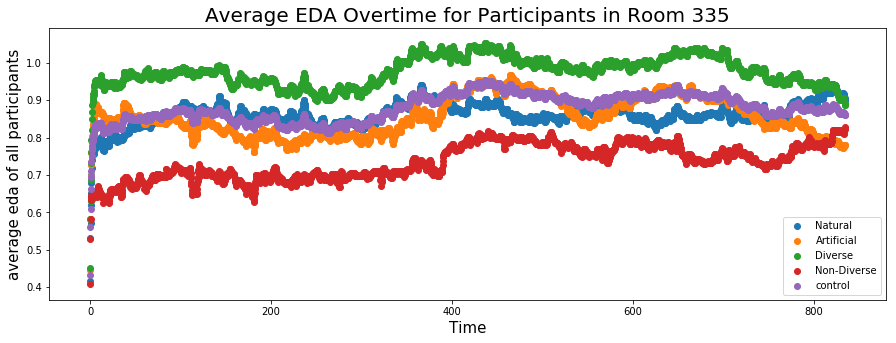

In [21]:
plt.figure(figsize=(15, 5))
plt.scatter(x_values, average_335_nat, label="Natural")
plt.scatter(x_values, average_335_art, label ="Artificial")
plt.scatter(x_values, average_335_diverse, label ="Diverse")
plt.scatter(x_values, average_335_nond, label="Non-Diverse")
plt.scatter(x_values, average_335, label="control")
plt.xlabel("Time", fontsize= 15)
plt.ylabel("average eda of all participants", fontsize = 15)
plt.title("Average EDA Overtime for Participants in Room 335", fontsize = 20)
plt.legend()
plt.show()

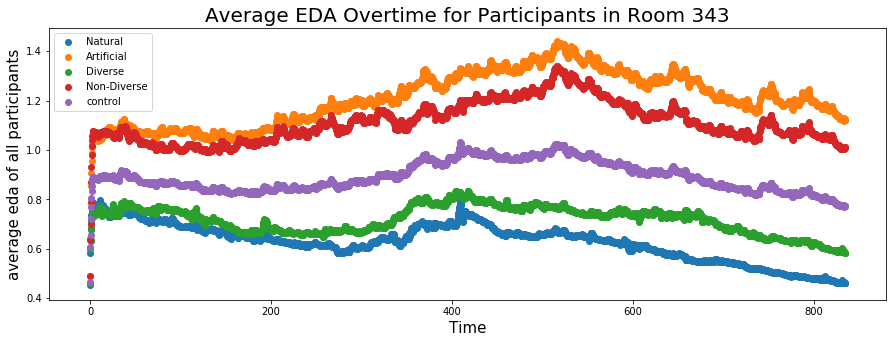

In [22]:
plt.figure(figsize=(15,5))
plt.scatter(x_values, average_343_natural, label="Natural")
plt.scatter(x_values, average_343_artificial, label="Artificial")
plt.scatter(x_values, average_343_diverse, label="Diverse")
plt.scatter(x_values, average_343_nond, label="Non-Diverse")
plt.scatter(x_values, average_343, label="control")
plt.xlabel("Time", fontsize= 15)
plt.ylabel("average eda of all participants", fontsize = 15)
plt.title("Average EDA Overtime for Participants in Room 343", fontsize = 20)
plt.legend()
plt.show()

In [23]:
average_natural = average_over_time_mat(study_conditions, "Natural")
average_artificial = average_over_time_mat(study_conditions, "Artificial")
average_nond = average_over_time_div(study_conditions, "Non-Diverse")
average_diverse = average_over_time_div(study_conditions, "Diverse")
average_all = average_eda(pd.unique(condition_eda_convert(study_conditions)['participant']))

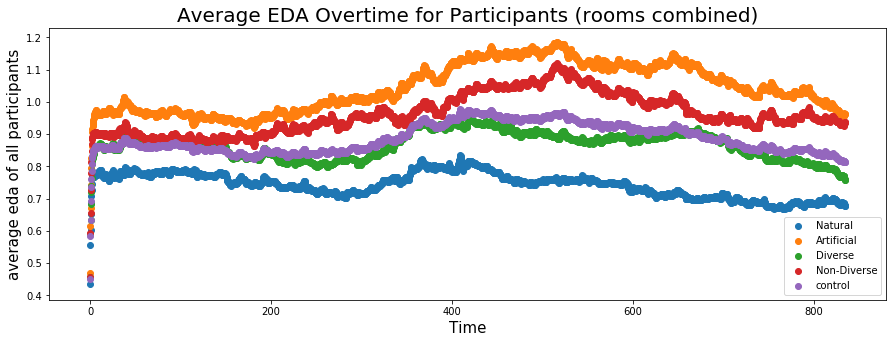

In [24]:
plt.figure(figsize=(15,5))
plt.scatter(x_values, average_natural, label="Natural")
plt.scatter(x_values, average_artificial, label="Artificial")
plt.scatter(x_values, average_diverse, label="Diverse")
plt.scatter(x_values, average_nond, label="Non-Diverse")
plt.scatter(x_values, average_all, label="control")
plt.xlabel("Time", fontsize= 15)
plt.ylabel("average eda of all participants", fontsize = 15)
plt.title("Average EDA Overtime for Participants " + "(" + "rooms combined" + ")", fontsize = 20)
plt.legend()
plt.show()

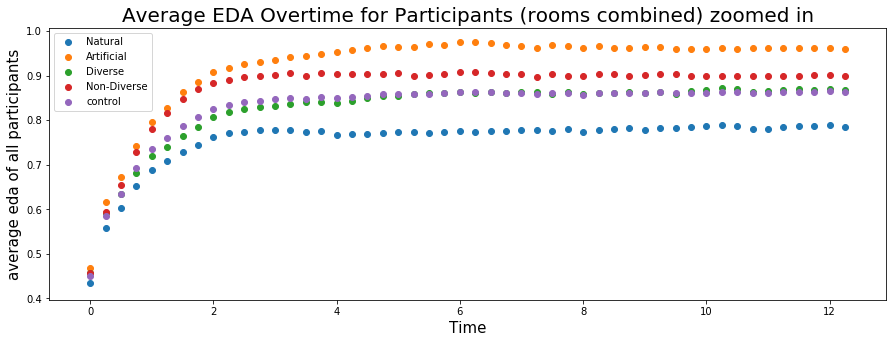

In [29]:
plt.figure(figsize=(15,5))
plt.scatter(x_values[:50], average_natural[:50], label="Natural")
plt.scatter(x_values[:50], average_artificial[:50], label="Artificial")
plt.scatter(x_values[:50], average_diverse[:50], label="Diverse")
plt.scatter(x_values[:50], average_nond[:50], label="Non-Diverse")
plt.scatter(x_values[:50], average_all[:50], label="control")
plt.xlabel("Time", fontsize= 15)
plt.ylabel("average eda of all participants", fontsize = 15)
plt.title("Average EDA Overtime for Participants " + "(" + "rooms combined" + ")" + " zoomed in", fontsize = 20)
plt.legend()
plt.show()

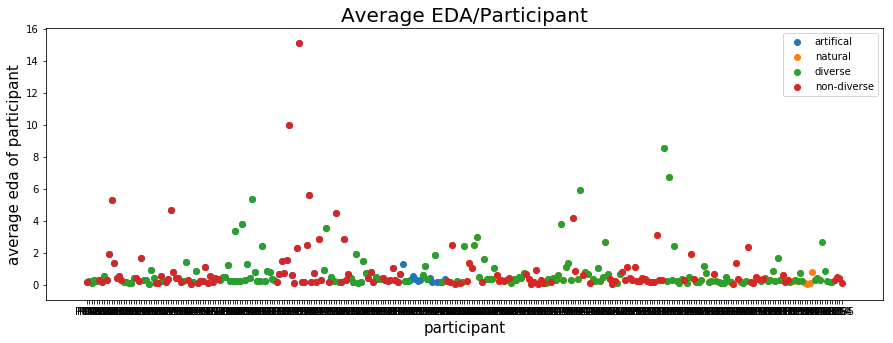

In [26]:
plt.figure(figsize=(15,5))
plt.scatter(unique_art, avg_list_art, label='artifical')
plt.scatter(part_nature, natural_list, label='natural')
plt.scatter(part_diverse, diverse_list, label='diverse')
plt.scatter(part_non, non_diverse, label='non-diverse')
plt.xlabel("participant", fontsize= 15)
plt.ylabel("average eda of participant", fontsize = 15)
plt.title("Average EDA/Participant", fontsize = 20)
plt.legend(loc="upper right")
plt.show()